In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

os.makedirs("tmp", exist_ok=True)

## Visualize bboxes

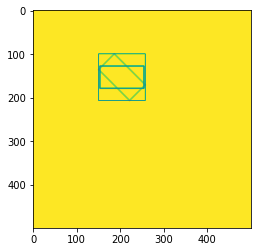

In [20]:
#iamge
img = np.ones((500, 500))*255
#target in center format => find target in bbox??
cx, cy, w, h, alpha = 204.2, 154.0, 100.5, 50.2, np.pi/4

#step1: src for straight rectangle
tl = (cx-w/2, cy-h/2)
tr = (cx+w/2, cy-h/2)
bl = (cx-w/2, cy+h/2)
br = (cx+w/2, cy+h/2)
src_points = np.array([tl, tr, br, bl]).T

#step2: center, angle => rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cx, cy), -alpha/np.pi*180, 1)
R = np.array(rotation_matrix[:2, :2])
t = np.array(rotation_matrix[:, 2])

#step3: multiply rotation matrix with src_points
x = R@src_points + np.expand_dims(t, 1)
x = x.astype(np.int32).T

result_tl = (np.min(x[:,0]), np.min(x[:,1]))
result_br = (np.max(x[:,0]), np.max(x[:,1]))

# #Visualize =>target in bbox
x = x.reshape((-1, 1, 2))
result = cv2.polylines(img, [x], True, 200, 2)
result = cv2.polylines(result, [src_points.astype(np.int32).T], True, 127, 2)
# cv2.imwrite(os.path.join('tmp', 'result.png'), result)
cv2.rectangle(result, result_tl, result_br, color=0)
plt.imshow(result)
plt.show()

In [10]:
# x = R@(src_points + np.expand_dims(t, 1))
x = R@src_points + np.expand_dims(t, 1)

x = x.astype(np.int32).T
x = x.reshape((-1, 1, 2))

result = cv2.polylines(img, [x], True, 0, 2)

result = cv2.polylines(result, [src_points.astype(np.int32).T], True, 127, 2)

cv2.imwrite(os.path.join('tmp', 'result.png'), result)

True

## Gen dataset list

In [8]:
from glob import glob
NUM_VAL=20

total_paths = []
for ext in ["*.jpg", "*.jpeg", "*.JPG", "*.JPEG", "*.png", "*.PNG", "*.bmp", "*.BMP"]:
    paths=glob("/content/Cow-detector/dataset/mixed-shed-1/images/"+ext)
    paths+=glob("/content/Cow-detector/dataset/mixed-shed-2/images/"+ext)
    total_paths.extend(paths)

total_paths = [path+"\n" for path in total_paths]
import random 
random.shuffle(total_paths)
with open("/content/Cow-detector/data/val_mixed_shed_12.txt", "w") as f:
    f.writelines(total_paths[-NUM_VAL:])

with open("/content/Cow-detector/data/train_mixed_shed_12.txt", "w") as f:
    f.writelines(total_paths[:-NUM_VAL])

## visualize shed1

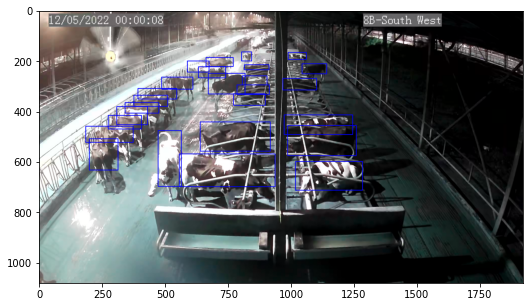

In [1]:
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

# paths = glob("/content/Cow-detector/dataset/shed-1/obj_train_data/*.txt")

path = "/content/Cow-detector/dataset/mixed-shed-1/labels/1#15$20220521143217234.txt"
plt.figure(figsize=(10,5))
img = cv2.imread(path.replace("labels", "images").replace("txt", "jpg"))
with open(path,"r") as f:
    bbox = f.readline()[:-1]
    while bbox:
        h,w,*c = img.shape
        coord = bbox.split(" ")[1:]
        coord = np.array([float(c) for c in coord])
        # import pdb; pdb.set_trace()
        coord[0::2]*=w
        coord[1::2]*=h
        x1,y1,w,h = coord.astype(np.uint).tolist()
        
        cv2.rectangle(img, (x1-w//2,y1-h//2), (x1+w//2,y1+h//2), (0,0,255), 2)
        bbox = f.readline()[:-1]
plt.imshow(img)
plt.show()
